In [ ]:
# [Business Problem] 
#Which Airport to build a new restaurant? 
#[Background]
##I am a manager to plan the new Japanese authentic restaurant. 
##These days, I am instructed by the boss to plan the restaurant for 'inbound tourist'. 
##Because they're increasing year by year, in 2018 inbound tourist is over 40 million a year. 
##So at first I will plan a new restaurant at the airport which is the first and last touch point in their trip. 
##I have to choose the airport on the basis of several data about tourist and airport.

In [ ]:
# I will use the data as follows(including source): 
##1)Immigration and Emigration number Source: Immigration 
###Statics by Minister of Justice http://www.moj.go.jp/housei/toukei/toukei_ichiran_nyukan.html 
##2)Total tour unit cost in Japan 
###Source:Consumption Trends of International Visitors to Japan Survey  http://www.mlit.go.jp/kankocho/siryou/toukei/shouhidoukou.html 
##3)Airport position(longitude and latitude) 
###Source: Airport GIS data by Ministry of Land, Infrastructure and Transport  http://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N08.html

In [56]:
# import the necessary Libraries 
import csv

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.cluster import KMeans

In [57]:
df_Emmigra  = pd.read_csv('/Users/tomofumiamano/desktop/Emmigration.csv', encoding="sjis", skipfooter=2, engine='python')

In [58]:
df_Emmigra['2017-2016'] = df_Emmigra['2017'] - df_Emmigra['2016']
df_Emmigra['2018-2017'] = df_Emmigra['2018'] - df_Emmigra['2017']

In [59]:
df_Emmigra

,Airport,2016,2017,2018,2017-2016,Unnamed: 5,Unnamed: 6,Unnamed: 7,2018-2017
0,Narita,6815021,7616063,8543597,801042,927534,111.75%,112.18%,927534
1,Kansai,6048786,7125275,7601739,1076489,476464,117.80%,106.69%,476464
2,Haneda,3272228,3731748,4036119,459520,304371,114.04%,108.16%,304371
3,Fukuoka,1631183,2194443,2422580,563260,228137,134.53%,110.40%,228137
4,Naha,1335029,1616946,1748887,281917,131941,121.12%,108.16%,131941
5,Shin_Chitose,1135421,1473681,1676669,338260,202988,129.79%,113.77%,202988
6,Chubu,1136621,1262179,1375707,125558,113528,111.05%,108.99%,113528
7,Kagoshima,76560,119824,161748,43264,41924,156.51%,134.99%,41924
8,Takamatsu,76301,117354,114163,41053,-3191,153.80%,97.28%,-3191
9,Fujisan_Shizuoka,114126,115615,112268,1489,-3347,101.30%,97.11%,-3347


In [60]:
df_TUP = pd.read_csv('/Users/tomofumiamano/desktop/TravelUnitPrice.csv', encoding="sjis", skipfooter=2, engine='python')

In [61]:
df_TUP['2017-2016'] = df_TUP['2017'] - df_TUP['2016']
df_TUP['2018-2017'] = df_TUP['2018'] - df_TUP['2017']

In [62]:
df_TUP

,Airport,2016,2017,2018,2017-2016,2018-2017
0,Haneda,140889,154287,172155,13398,17868
1,Narita,153695,154010,159723,315,5713
2,Kansai,134476,122031,122017,-12445,-14
3,Fujisan_Shizuoka,134307,173599,118592,39292,-55007
4,Chubu,101560,115268,117796,13708,2528
5,Takamatsu,69958,37035,112275,-32923,75240
6,Hiroshima,93464,88725,112236,-4739,23511
7,Shin_Chitose,99864,103295,104099,3431,804
8,Kagoshima,76014,121616,101473,45602,-20143
9,Naha,77639,73216,86146,-4423,12930


### Emmigration by Airtport 

In [8]:
df_Emmigra

,Airport,2016,2017,2018,2017-2016,2018-2017
0,Narita,6815021,7616063,8543597,801042,927534
1,Kansai,6048786,7125275,7601739,1076489,476464
2,Haneda,3272228,3731748,4036119,459520,304371
3,Fukuoka,1631183,2194443,2422580,563260,228137
4,Naha,1335029,1616946,1748887,281917,131941
5,Shin_Chitose,1135421,1473681,1676669,338260,202988
6,Chubu,1136621,1262179,1375707,125558,113528
7,Kagoshima,76560,119824,161748,43264,41924
8,Takamatsu,76301,117354,114163,41053,-3191
9,Fujisan_Shizuoka,114126,115615,112268,1489,-3347


### Inbound Traveler's  Unit Cost by Airtport 

In [9]:
df_TUP

,Airport,2016,2017,2018,2017-2016,2018-2017
0,Haneda,140889,154287,172155,13398,17868
1,Narita,153695,154010,159723,315,5713
2,Kansai,134476,122031,122017,-12445,-14
3,Fujisan_Shizuoka,134307,173599,118592,39292,-55007
4,Chubu,101560,115268,117796,13708,2528
5,Takamatsu,69958,37035,112275,-32923,75240
6,Hiroshima,93464,88725,112236,-4739,23511
7,Shin_Chitose,99864,103295,104099,3431,804
8,Kagoshima,76014,121616,101473,45602,-20143
9,Naha,77639,73216,86146,-4423,12930


True


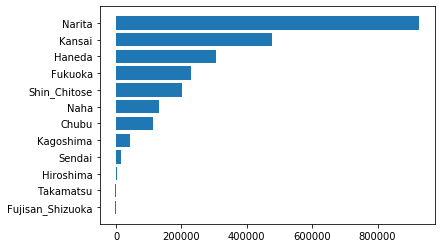

,Airport,2018-2017
0,Narita,927534
1,Kansai,476464
2,Haneda,304371
3,Fukuoka,228137
5,Shin_Chitose,202988
4,Naha,131941
6,Chubu,113528
7,Kagoshima,41924
10,Sendai,13981
11,Hiroshima,3515


In [10]:
df_Emmigra_sort = df_Emmigra.sort_values('2018-2017', ascending=False)
left = df_Emmigra_sort['Airport']
height1 = df_Emmigra_sort['2018-2017']
#height2 = df_Emmigra['2018-2017']

fig, ax = plt.subplots()
ax.invert_yaxis()
ax.barh(left, height1)
print(ax.yaxis_inverted())  

plt.show()
df_Emmigra_sort[['Airport','2018-2017']]

True


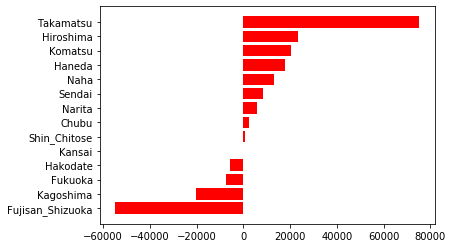

,Airport,2018-2017
5,Takamatsu,75240
6,Hiroshima,23511
12,Komatsu,20465
0,Haneda,17868
9,Naha,12930
11,Sendai,8500
1,Narita,5713
4,Chubu,2528
7,Shin_Chitose,804
2,Kansai,-14


In [11]:
df_TUP_sort = df_TUP.sort_values('2018-2017', ascending=False)
left1 = df_TUP_sort['Airport']
height2 = df_TUP_sort['2018-2017']

fig, ax1 = plt.subplots()
ax1.invert_yaxis()
ax1.barh(left1, height2, color="r")
print(ax1.yaxis_inverted())  

plt.show()
df_TUP_sort[['Airport','2018-2017']]

In [13]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [14]:
import folium

japan_location = [36, 135]
m = folium.Map(location=japan_location, zoom_start=5)

m

In [15]:
df_posi = pd.read_csv('/Users/tomofumiamano/desktop/AirportPosition.csv')

In [18]:
df_for_map1 = pd.merge(df_Emmigra, df_posi, how="inner" ,on="Airport")

In [19]:
df_for_map2 = pd.merge(df_TUP, df_posi, how="inner" ,on="Airport")

In [54]:
import folium

japan_location = [36, 135]
m1 = folium.Map(location=japan_location, zoom_start=5)


for i, r in df_for_map1.iterrows():
    folium.CircleMarker(
        location=[r['latitude'], r['longtude']], 
        radius=r["2018-2017"] / 10000 , 
        popup=r["Airport"],
        color='#3186cc',
        fill_color='#3186cc'
    ).add_to(m)

m1                                                           

In [53]:
import folium

japan_location = [36, 135]
m2 = folium.Map(location=japan_location, zoom_start=5)


for i, r in df_for_map2.iterrows():
    folium.CircleMarker(
        location=[r['latitude'], r['longtude']], 
        radius=r["2018-2017"] / 1000 , 
        popup=r["Airport"],
        color='#3186cc',
        fill_color='#3186cc'
    ).add_to(m)

m2